## File : Exercise 12-1_Edris_Safari.ipynb
## Name:Edris Safari
## Date:2/09/2019
## Course: DSC530 - Data Exploration and Analysis
## Desc: Week8 exercise 12-1 assignment

The linear model I used in this chapter has the obvious drawback that it is linear, and there is no reason to expect prices to change linearly over time. We can add flexibility to the model by adding a quadratic term, as we did in Section 11.3.

Use a quadratic model to fit the time series of daily prices, and use the model to generate predictions. You will have to write a version of `RunLinearModel` that runs that quadratic model, but after that you should be able to reuse code from the chapter to generate predictions.

In [14]:
from __future__ import print_function, division

import pandas
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.tsa.stattools as smtsa

import matplotlib.pyplot as pyplot

import thinkplot
import thinkstats2
import timeseries


In [15]:
# 



def RunQuadraticModel(daily):
    """Runs a Quadratic model of price per gram versus years and years squared.

    daily: DataFrame of daily prices

    returns: model, results
    """
    # Create a new column for the model
    daily['years2'] = daily.years**2
    model = smf.ols('ppg ~ years + years2', data=daily)
    results = model.fit()
    return model, results


    

## Time series analysis

Load the data from "Price of Weed".

In [16]:
transactions = pd.read_csv('mj-clean.csv', parse_dates=[5])
transactions.head()

,city,state,price,amount,quality,date,ppg,state.name,lat,lon
0,Annandale,VA,100,7.075,high,2010-09-02,14.13,Virginia,38.830345,-77.213870
1,Auburn,AL,60,28.300,high,2010-09-02,2.12,Alabama,32.578185,-85.472820
2,Austin,TX,60,28.300,medium,2010-09-02,2.12,Texas,30.326374,-97.771258
3,Belleville,IL,400,28.300,high,2010-09-02,14.13,Illinois,38.532311,-89.983521
4,Boone,NC,55,3.540,high,2010-09-02,15.54,North Carolina,36.217052,-81.687983


`dailies` is the map from quality name to DataFrame.

In [35]:
dailies = timeseries.GroupByQualityAndDay(transactions)

In [36]:
name = 'high'
daily = dailies[name]

model, results = RunQuadraticModel(daily)
results.summary()    


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    ppg   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     517.5
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          4.57e-164
Time:                        13:52:40   Log-Likelihood:                -1497.4
No. Observations:                1241   AIC:                             3001.
Df Residuals:                    1238   BIC:                             3016.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6980      0.067    205.757      0.000      13.567      13.829
years         -1.1171      0.084    -13.326      0.000      -1.282      -0.953
years2         0.1132      0.022      5.060      0.000       0.069       0.157
==============================================================================
Omnibus:                       49.112   Durbin-Watson:                   1.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.885
Skew:                           0.199   Prob(JB):                     1.86e-25
Kurtosis:                       4.430   Cond. No.                         27.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coeffcient for years show a decline in price. However, the years squared shows slight increase.

Plot the fitted line.

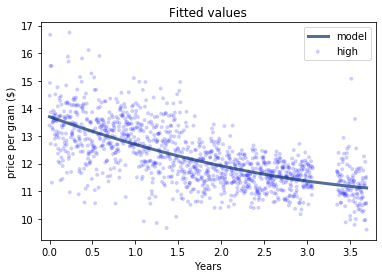

In [22]:
timeseries.PlotFittedValues(model, results, label=name)
thinkplot.Config(title='Fitted values',
                 xlabel='Years',
                 xlim=[-0.1, 3.8],
                 ylabel='price per gram ($)')

Generate predictions. 

In [33]:
#create 100 samples starting from zero ending to 5 years to setup limits on the prediction graph(from -0.1 to 5.1)
years = np.linspace(0, 5, 101)
years[-1]+.1

5.1

In [ ]:
thinkplot.Scatter(daily.years, daily.ppg, alpha=0.1, label=name)
timeseries.PlotPredictions(daily, years, func=RunQuadraticModel)
thinkplot.Config(title='predictions',
                 xlabel='Years',
                 xlim=[years[0]-0.1, years[-1]+0.1],
                 ylabel='Price per gram ($)')
